# Student Dataset

## Generating Unique Seed

In [9]:
import hashlib
username = "reddy.bathula"
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)

## Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Student dataset Class for generating and analysing the dataset.

In [11]:
## Question 1.0: Dataset Generation ##
class StudentDataset:
    """
        A class to generate synthetic StudentDataset with the specified attributes such as gender, majors, programs, and GPA based on specified probability distribution.
        """
    def __init__(self, num_students: int, seed: int):
        """
        Initializing the StudentDataset class with number of students and the seed value.
        All relevant parameters are defined within this method for improved organization and to allow flexibility in moving them outside the class if needed.
        """

        self.num_students = num_students
        self.random_number_generator = np.random.default_rng(seed)

        self.genders = ['Male', 'Female', 'Other']
        self.genders_distribution = [0.65, 0.33, 0.02]

        self.majors = ['B.Tech', 'MS', 'PhD']
        self.majors_distribution = [0.7, 0.2, 0.1]

        self.programs = ['CSE', 'ECE', 'CHD', 'CND']
        self.programs_distribution_conditioned_on_majors = [
                                                            [0.4, 0.4, 0.1, 0.1], #B.Tech
                                                            [0.3, 0.3, 0.2, 0.2], #MS
                                                            [0.25, 0.25, 0.25, 0.25] #PhD
                                                            ]

        self.gpa_distribution = [
                                [7.0, 1.0], # B.Tech
                                [8.0, 0.7], # MS
                                [8.3, 0.5]  # PhD
                                ]

        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        '''
        Generating a list of gender for all students based on the given gender distribution.
        '''
        gender = self.random_number_generator.choice(self.genders, p=self.genders_distribution, size=self.num_students).tolist()
        return gender

    def generate_major(self) -> list[str]:
        '''
        Generating a list of major for all students based on the given major distribution.
        '''
        major = self.random_number_generator.choice(self.majors, p=self.majors_distribution, size=self.num_students).tolist()
        return major

    def generate_program(self, majors: list[str]) -> list[str]:
        """
        Generating a list of program conditioned on the majors based on the givendistribution.
        """
        program_data = []
        for i in range(len(majors)):
            major_index = self.majors.index(majors[i])
            program = self.random_number_generator.choice(self.programs, p=self.programs_distribution_conditioned_on_majors[major_index]).tolist()
            program_data.append(program)
        return program_data

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """
        Generating a list of GPA for all students based on their majors.
        """
        gpa_data = []
        for i in range(len(majors)):
            major_index = self.majors.index(majors[i])
            mean, std_dev = self.gpa_distribution[major_index]
            gpa = self.random_number_generator.normal(mean, std_dev)
            gpa = float(np.clip(gpa, 4, 10))
            gpa_data.append(gpa)
        return gpa_data

    def assemble_dataframe(self) -> pd.DataFrame:
        """
        Assemble the generated data into a pandas DataFrame.
        """
        majors = self.generate_major()
        data = {
            "gender": self.generate_gender(),
            "major": majors,
            "program": self.generate_program(majors),
            "GPA": self.generate_gpa(majors)
        }
        self.df = pd.DataFrame(data)
        return self.df

    def get_full_dataframe(self) -> pd.DataFrame:
        """
        Get the full DataFrame containing all student data.
        """
        return self.df
## Question 1.1: Data Analysis ##
### A) Visualization ###

    def _watermark(self, ax,len=0.95,width=0.95,fontsize=10) -> None:
        """Username in the plots."""
        ax.text(
            len, width, "reddy.bathula",
            ha='right', va='top',
            transform=ax.transAxes,
            fontsize=fontsize, color='gray', alpha=0.7
        )

    def plot_gender_distribution(self) -> None:
        '''
        Plot the gender distribution of the students.
        Function to visualize the gender distribution using a pie chart.
        '''
        data = self.df["gender"].value_counts()
        sizes = data.values
        labels = data.index
        explode = [0.02,0.02,0.02]

        pie_radius = 2
        pie_startangle = 5
        pie_label_dist = 0.5
        pie_pct_dist = 1.15

        text_font_size = 20
        text_font_color = "#444444"
        text_font_weight = 'bold'
        pie_textprops = {'fontsize': text_font_size, 'color': text_font_color, 'fontweight': text_font_weight}
        mycolors = ['#5D688A','#F7A5A5','#FFDBB6']

        title_font = 24
        title_pos_x = 0.1
        title_pos_y = 1.4
        title_font_weight = 'bold'

        fig, ax = plt.subplots()
        ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=pie_pct_dist, labeldistance=pie_label_dist, startangle=pie_startangle, radius=pie_radius, textprops=pie_textprops, colors=mycolors)
        ax.set_title("Gender Distribution",fontsize=title_font,x=title_pos_x, y=title_pos_y,fontweight=title_font_weight)
        self._watermark(ax,1.5,1.5,16)
        plt.show()

        return
    
    def plot_major_distribution(self) -> None:
        '''
        Plot the major distribution of the students.
        Function to visualize the major distribution using a stacked bar chart.
        '''
        data = self.df["major"].value_counts().rename('Percentage')
        df_for_plot = data.to_frame().T

        sizes = data.values
        percentages = sizes/sum(sizes)
        labels = [f"{percentage:.3f}%" for percentage in percentages]

        text_font_size = 20
        text_font_color = "#444444"
        text_font_weight = 'bold'
        pie_textprops = {'fontsize': text_font_size, 'color': text_font_color, 'fontweight': text_font_weight}
        mycolors = ['#D6A99D','#FBF3D5','#D6DAC8']

        title_font = 24
        title_pos_x = 0.01
        title_pos_y = 1.1
        title_font_weight = 'bold'

        watermark_pos_x = 1.15
        watermark_pos_y = 1.2
        watermark_fontsize = 20


        ax = df_for_plot.plot(kind="barh", stacked=True, figsize=(25, 5), color=mycolors,fontsize=text_font_size)
        for i, container in enumerate(ax.containers):
                ax.bar_label(container, labels=[labels[i]], label_type='center', color='darkblue', fontweight=text_font_weight, fontsize=text_font_size)
        ax.set_title("Distribution of Majors", fontsize=title_font, fontweight=title_font_weight, x=title_pos_x, y=title_pos_y)
        ax.set_xlabel("Number of Students", fontsize=text_font_size)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.invert_yaxis()
        ax.legend(title="Major",title_fontsize=title_font, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=title_font)

        self._watermark(ax,len=watermark_pos_x,width=watermark_pos_y,fontsize=watermark_fontsize)
        plt.show()

        return

    def plot_program_distribution(self) -> None:
        '''
        Plot the program distribution of the students.
        Function to visualize the program distribution using a stacked bar chart.
        '''
        data = self.df["program"].value_counts().rename('Percentage')
        df_for_plot = data.to_frame().T

        sizes = data.values
        percentages = sizes/sum(sizes)
        labels = [f"{percentage:.3f}%" for percentage in percentages]

        text_font_size = 20
        text_font_color = "#FFFFFF"
        text_font_weight = 'bold'
        mycolors = ['#FE7743',"#000000",'#273F4F','#447D9B']

        title_font = 24
        title_pos_x = 0.01
        title_pos_y = 1.1
        title_font_weight = 'bold'

        watermark_pos_x = 1.15
        watermark_pos_y = 1.2
        watermark_fontsize = 20


        ax = df_for_plot.plot(kind="barh", stacked=True, figsize=(25, 5), color=mycolors,fontsize=text_font_size)
        for i, container in enumerate(ax.containers):
                ax.bar_label(container, labels=[labels[i]], label_type='center', color=text_font_color, fontweight=text_font_weight, fontsize=text_font_size)
        ax.set_title("Distribution of Programs", fontsize=title_font, fontweight=title_font_weight, x=title_pos_x, y=title_pos_y)
        ax.set_xlabel("Number of Students", fontsize=text_font_size)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.invert_yaxis()
        ax.legend(title="Program",title_fontsize=title_font, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=title_font)

        self._watermark(ax,len=watermark_pos_x,width=watermark_pos_y,fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_gpa_distribution(self, bins: int = 20) -> None:
        '''
        Plot the GPA distribution of the students.
        Function to visualize the GPA distribution using a histogram.
        '''
        text_font_size = 20
        title_font = 24
        title_pos_x = 0.01
        title_pos_y = 1.11
        title_font_weight = 'bold'
        watermark_pos_x = 1.15
        watermark_pos_y = 1.2
        watermark_fontsize = 20

        gpa_mean = self.df["GPA"].mean()
        gpa_std = self.df["GPA"].std()

        ax = self.df["GPA"].plot(kind="hist", bins=bins, color="purple",figsize=(21,8), alpha=0.7, edgecolor='black', linewidth=1.2)

        ax.axvline(gpa_mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {gpa_mean:.2f} +/- {gpa_std:.2f}')
        ax.legend(fontsize=14)

        plt.title("GPA Distribution", fontsize=title_font, fontweight=title_font_weight, x=title_pos_x, y=title_pos_y)
        ax.set_xlabel("GPA", fontsize=text_font_size)
        ax.set_ylabel("Number of Students", fontsize=text_font_size)

        ax.tick_params(axis='both', labelsize=text_font_size)


        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_program_by_major(self) -> None:
        '''
        Plot the program distribution conditioned on major.
        Function to visualize using a stacked bar chart.
        '''
        text_font_size = 30
        text_font_color = "#131313"
        text_font_weight = 'bold'
        title_font = 26
        title_pos_x = 0.01
        title_pos_y = 1.11
        title_font_weight = 'bold'

        watermark_pos_x = 1.3
        watermark_pos_y = 1.2
        watermark_fontsize = 22



        ctab = pd.crosstab(self.df["major"], self.df["program"])
        ax = ctab.plot(kind="barh", stacked=True, figsize=(25, 5), colormap='Pastel2')

        for container in ax.containers:
            ax.bar_label(container, label_type='center', fmt='%d', color=text_font_color, fontweight=text_font_weight, fontsize=watermark_fontsize)

        ax.set_title("Program Conditioned on Major", fontsize=title_font, fontweight=title_font_weight, x=title_pos_x, y=title_pos_y)
        ax.set_xlabel("Number of Students", fontsize=text_font_size, color=text_font_color)
        ax.set_ylabel("Major", fontsize=text_font_size, color=text_font_color)
        ax.legend(title="Program", title_fontsize=title_font, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=text_font_size)
        ax.tick_params(axis='both', labelsize=26)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_gpa_by_major(self) -> None:
        '''
        Plot the GPA distribution conditioned on major.
        Function to visualize using a box plot.
        '''
        label_font_size = 25
        title_font = 26
        title_pos_x = 0.01
        title_pos_y = 1.11
        title_font_weight = 'bold'

        watermark_pos_x = 1
        watermark_pos_y = 1.2
        watermark_fontsize = 16

        fig, ax = plt.subplots(figsize=(20, 7))

        ax = sns.boxplot(x="major", y="GPA", hue='major', legend=False, data=self.df, palette='Accent')
        ax.set_title("GPA Conditioned on Major", fontsize=title_font, x=title_pos_x, y=title_pos_y, fontweight=title_font_weight)

        ax.set_xlabel("Major", fontsize=label_font_size)
        ax.set_ylabel("GPA", fontsize=label_font_size)

        ax.tick_params(axis='both', labelsize=watermark_fontsize)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_gpa_by_program(self) -> None:
        '''
        Plot the GPA distribution conditioned on program.
        Function to visualize using a box plot.
        '''
        label_font_size = 25
        title_font = 26
        title_pos_x = 0.01
        title_pos_y = 1.11
        title_font_weight = 'bold'

        watermark_pos_x = 1
        watermark_pos_y = 1.2
        watermark_fontsize = 16

        fig, ax = plt.subplots(figsize=(20, 7))

        ax = sns.boxplot(x="program", y="GPA", hue='program', legend=False, data=self.df, palette='Set2')
        ax.set_title("GPA Conditioned on Program", fontsize=title_font, x=title_pos_x, y=title_pos_y, fontweight=title_font_weight)

        ax.set_xlabel("Program", fontsize=label_font_size)
        ax.set_ylabel("GPA", fontsize=label_font_size)
        ax.tick_params(axis='both', labelsize=watermark_fontsize)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_gpa_by_program_and_major(self) -> None:
        '''
        Plot the GPA distribution conditioned on program and major.
        Function to visualize using a box plots.
        '''
        label_font_size = 24
        title_font = 26
        title_pos_x = 0.01
        title_pos_y = 1.11
        title_font_weight = 'bold'

        watermark_pos_x = 1
        watermark_pos_y = 1.2
        watermark_fontsize = 16

        fig, ax = plt.subplots(figsize=(25, 7))

        ax = sns.boxplot(x="program", y="GPA", hue='major', legend=True, data=self.df, palette='Set3')

        ax.legend(title="Major", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=label_font_size, title_fontsize=title_font)

        ax.set_title("GPA Conditioned on Program and Major", fontsize=title_font, x=title_pos_x, y=title_pos_y, fontweight=title_font_weight)
        ax.set_xlabel("Program", fontsize=label_font_size)
        ax.set_ylabel("GPA", fontsize=label_font_size)
        ax.tick_params(axis='both', labelsize=label_font_size)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return
    
    def plot_sampled_dataset(self, n: int = 100) -> None:
        '''
        Plot a sampled dataset for visualization.
        Takes is the requested sample size. Samples from the master dataframe and visualizes the distributions.
        '''

        plt.rcParams.update({
            "axes.labelsize": 20,
            "xtick.labelsize": 18,
            "ytick.labelsize": 18,
            "axes.titlesize": 24
        })

        title_font = 26
        title_pos_x = 0.01
        title_pos_y = 1
        title_font_weight = 'bold'

        watermark_pos_x = 1
        watermark_pos_y = 1.2
        watermark_fontsize = 16

        sample = self.df.sample(n=n, random_state=self.random_number_generator)
        fig, axes = plt.subplots(2, 2, figsize=(25, 9))

        sns.countplot(data=sample, x="gender", hue='gender', order=self.genders, ax=axes[0, 0], palette="pastel", legend=False)
        axes[0, 0].set_title("Gender (sample)")

        sns.countplot(data=sample, x="major", hue='major', order=self.majors, ax=axes[0, 1], palette="muted", legend=False)
        axes[0, 1].set_title("Major (sample)")

        sns.countplot(data=sample, x="program", hue='program', order=self.programs, ax=axes[1, 0], palette="deep", legend=False)
        axes[1, 0].set_title("Program (sample)")
        axes[1, 0].tick_params(axis='x', rotation=10)

        sns.boxplot(data=sample, x="major", y="GPA", hue='major', order=self.majors, ax=axes[1, 1], palette="Set2", legend=False)
        axes[1, 1].set_title("GPA by Major (sample)")

        plt.suptitle(f"Sample of {len(sample)} Students", x=title_pos_x, y=title_pos_y, fontsize=title_font, fontweight=title_font_weight)
        plt.tight_layout()
        for ax in axes.ravel():
            self._watermark(ax, len=watermark_pos_x, width=watermark_pos_y, fontsize=watermark_fontsize)
        plt.show()
        return

    def plot_entire_dataset_summary(self) -> None:
        '''
        Plot the entire dataset summary using pairplots.
        '''
        bins = 15
        alpha = 0.6
        title_font = 20
        legend_fontsize = 18

        watermark_pos_x = 4.0
        watermark_pos_y = 2.2

        plot_df = self.df.copy()
        axes = sns.FacetGrid(plot_df, row='major', col='program', hue='gender', palette='Set2', margin_titles=True, height=4)
        axes.map_dataframe(sns.histplot, x="GPA", kde=True, bins=bins, alpha=alpha)
        axes.add_legend(title="Gender"
                        )
        legend = axes._legend
        if legend is not None:
            legend.set_title("Gender")
            legend.get_title().set_fontsize(title_font)
            for text in legend.get_texts():
                text.set_fontsize(legend_fontsize) 


        axes.set_titles(col_template="{col_name}", row_template="{row_name}", size=title_font)
        axes.set_axis_labels("GPA", "Count", fontsize=title_font)

        for ax in axes.axes.flatten():
            if ax is not None:
                ax.tick_params(axis="x", labelsize=legend_fontsize)
                ax.tick_params(axis="y", labelsize=legend_fontsize)
        self._watermark(axes.axes[1,1], len=watermark_pos_x, width=watermark_pos_y, fontsize=title_font)
        plt.show()

        return

    def total_visualization(self) -> None:
        self.plot_gender_distribution()
        self.plot_major_distribution()
        self.plot_program_distribution()
        self.plot_gpa_distribution()
        self.plot_program_by_major()
        self.plot_gpa_by_major()
        self.plot_gpa_by_program()
        self.plot_gpa_by_program_and_major()
        self.plot_sampled_dataset()
        self.plot_entire_dataset_summary()
        return


    def gpa_mean_std(self) -> tuple[float, float]:
        """
        Compute the mean and standard deviation of GPA for the entire dataset.
        """
        mean_gpa = float(self.df['GPA'].mean())
        std_gpa = float(self.df['GPA'].std())
        print(f"Dataset GPA Statistics:")
        print(f"Mean GPA: {mean_gpa:.4f}")
        print(f"Standard Deviation: {std_gpa:.4f}")
        return mean_gpa, std_gpa


    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """
        Count the number of students for each unique (program, major) pair.
        """
        counts_df = self.df.groupby(['program', 'major']).size().reset_index(name='count')
        counts_pivot = counts_df.pivot(index='program', columns='major', values='count').fillna(0)
        
        print("Student counts per (program, major) pair:")
        print(counts_pivot)
        return counts_pivot

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        """
        Visualize student counts per program-major pair with a heatmap.
        """
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(counts_df, annot=True, fmt='.0f', cmap='Blues', ax=ax)
        ax.set_title("Student Distribution: Program vs Major")
        ax.set_xlabel("Major")
        ax.set_ylabel("Program")
        self._watermark(ax)
        plt.tight_layout()
        plt.show()


    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """
        Sample n students uniformly at random, repeat 'repeats' times.
        Calculate mean GPA for each sample and return average mean and std of means.
        """
        sample_means = []
        for _ in range(repeats):
            sample = self.df.sample(n=n, random_state=self.random_number_generator)
            gpa = sample['GPA'].mean()
            std = sample['GPA'].std()
            sample_means.append(gpa)

        avg_mean = float(np.mean(sample_means))
        std_of_means = float(np.std(sample_means))

        print(f"Random Sampling Results (n={n}, repeats={repeats}):")
        print(f"Average mean GPA: {avg_mean:.4f}")
        print(f"Standard deviation of means: {std_of_means:.4f}")
        return avg_mean, std_of_means

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """
        Stratified sampling by major based on their proportion in the dataset.
        """
        sample_means = []
        major_proportions = self.df['major'].value_counts(normalize=True)
        
        for _ in range(repeats):
            stratified_sample = pd.DataFrame()
            for major in self.majors:
                major_data = self.df[self.df['major'] == major]
                sample_size = int(n * major_proportions[major])
                if sample_size > 0:
                    major_sample = major_data.sample(n=min(sample_size, len(major_data)), random_state=self.random_number_generator)
                    stratified_sample = pd.concat([stratified_sample, major_sample])
            
            sample_means.append(stratified_sample['GPA'].mean())
        
        avg_mean = float(np.mean(sample_means))
        std_of_means = float(np.std(sample_means))
        
        print(f"Stratified Sampling Results (n={n}, repeats={repeats}):")
        print(f"Average mean GPA: {avg_mean:.4f}")
        print(f"Standard deviation of means: {std_of_means:.4f}")
        return avg_mean, std_of_means


    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """
        Sample n students with exact same count across genders.
        """
        results = []
        per_gender = n // len(self.genders)
        
        for rep in range(repeats):
            samples_list = []
            for gender in self.genders:
                gender_data = self.df[self.df['gender'] == gender]
                if not gender_data.empty:
                    sample = gender_data.sample(
                        n=per_gender, 
                        replace=(len(gender_data) < per_gender),
                        random_state=self.random_number_generator
                    )
                    samples_list.append(sample)
        
            balanced_sample = pd.concat(samples_list, ignore_index=True)    
            counts = balanced_sample['gender'].value_counts().to_dict()
            results.append(counts)
            print(f"Repeat {rep+1}: {counts}")  
        return results

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """
        Sampling Strategy A: Randomly pick a gender with equal probability, 
        then randomly pick a student from that gender.
        """
        results = []
        gender_groups = {gender: self.df[self.df['gender'] == gender] for gender in self.genders}
        for rep in range(repeats):
            gender_choices = self.random_number_generator.choice(self.genders, size=n)
            gender_counts_needed = pd.Series(gender_choices).value_counts()
            samples = []
            for gender, count in gender_counts_needed.items():
                original_count = len(gender_groups[gender])
                sample = gender_groups[gender].sample(
                    n=count, 
                    replace=(original_count < count), 
                    random_state=self.random_number_generator
                )
                samples.append(sample)
        
            sample_df = pd.concat(samples)            
            counts = sample_df['gender'].value_counts().to_dict()
            results.append(counts)
            print(f"Strategy A Repeat {rep+1}: {counts}")
        return results

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
        """
        Plot average maximum relative difference vs sample size using Strategy A.
        """
        avg_max_diffs = []
        gender_groups = {gender: self.df[self.df['gender'] == gender] for gender in self.genders}

        for n in sample_sizes:
            max_diffs = []
            for _ in range(repeats):
                gender_choices = self.random_number_generator.choice(self.genders, size=n)
                gender_counts_needed = pd.Series(gender_choices).value_counts()
                samples = []
                for gender, count in gender_counts_needed.items():
                    original_count = len(gender_groups[gender])
                    sample = gender_groups[gender].sample(n=count, replace=(original_count < count), random_state=self.random_number_generator)
                    samples.append(sample)
                sample_df = pd.concat(samples)

                counts = sample_df['gender'].value_counts()

                if len(counts) < 2:
                    max_diff = 1.0 
                else:
                    max_diff = (counts.max() - counts.min()) / n
                
                max_diffs.append(max_diff)
            
            avg_max_diff = np.mean(max_diffs)
            avg_max_diffs.append(avg_max_diff)
            print(f"Sample size {n}: Average max relative difference = {avg_max_diff:.4f}")
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(sample_sizes, avg_max_diffs, color='skyblue', width=100)
        ax.set_xlabel('Sample Size')
        ax.set_ylabel('Average Maximum Relative Difference')
        ax.set_title('Gender Balance vs Sample Size (Strategy A)')
        self._watermark(ax) 
        plt.tight_layout()
        plt.show()
        return

    def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
        """
        Using Strategy A, select n students with GPA values approximately 
        uniformly distributed across bins.
        """

        gpa_min, gpa_max = self.df['GPA'].min(), self.df['GPA'].max()
        bin_edges = np.linspace(gpa_min, gpa_max, bins + 1)

        binned_data = []
        for i in range(bins):
            bin_min, bin_max = bin_edges[i], bin_edges[i + 1]

            if i == bins - 1: 
                bin_students_df = self.df[(self.df['GPA'] >= bin_min) & (self.df['GPA'] <= bin_max)]
            else:
                bin_students_df = self.df[(self.df['GPA'] >= bin_min) & (self.df['GPA'] < bin_max)]
            
            binned_data.append({'index': i, 'count': len(bin_students_df), 'data': bin_students_df})
            print(f"Bin {i+1:2d} (GPA {bin_min:.2f}-{bin_max:.2f}): Found {len(bin_students_df):4d} students.")

        sorted_bins = sorted(binned_data, key=lambda x: x['count'], reverse=True)
        base_quota = n // bins
        remainder = n % bins
        
        sampled_students = []
        
        for i in range(len(sorted_bins)):
            current_bin = sorted_bins[i]
            bin_df = current_bin['data']
            original_count = current_bin['count']
            
            target_quota = base_quota + 1 if i < remainder else base_quota
            
            if original_count > 0:
                sample = bin_df.sample(
                    n=target_quota,
                    replace=(original_count < target_quota), 
                    random_state=self.random_number_generator
                )
                sampled_students.append(sample)

        uniform_sample = pd.concat(sampled_students, ignore_index=True)
        print(f"\nSuccessfully sampled {len(uniform_sample)} students.")
        return uniform_sample

    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
        """
        Plot GPA histogram comparison between original and sampled data.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
        ax1.hist(self.df['GPA'], bins=30, alpha=0.7, color='blue', edgecolor='black')
        ax1.set_title('Original Dataset GPA Distribution')
        ax1.set_xlabel('GPA')
        ax1.set_ylabel('Frequency')
        self._watermark(ax1)
        

        ax2.hist(sampled_df['GPA'], bins=30, alpha=0.7, color='red', edgecolor='black')
        ax2.set_title('Uniform Sampled GPA Distribution')
        ax2.set_xlabel('GPA')
        ax2.set_ylabel('Frequency')
        self._watermark(ax2)
        
        plt.tight_layout()
        plt.show()

    def sample_program_major_balanced(self, n: int) -> pd.DataFrame:
        """
        Using Strategy A, select n students such that all valid (program, major) combinations are represented approximately equally.
        """
        counts = self.df.groupby(['program', 'major']).size().sort_values(ascending=False)
        valid_combos = counts.index.tolist()

        if not valid_combos:
            print("No valid combinations found. Returning an empty DataFrame.")
            return pd.DataFrame()
            
        base_quota = n // len(valid_combos)

        sampled_students = []
        for _ in range(n):
            program, major = self.random_number_generator.choice(valid_combos)
            combo_students = self.df[(self.df['program'] == program) & (self.df['major'] == major)]
            original_count = len(combo_students)
            sample = combo_students.sample(n=1, replace=(original_count < base_quota), random_state=self.random_number_generator)
            sampled_students.append(sample)
    
        balanced_sample = pd.concat(sampled_students, ignore_index=True)
        print(f"\nSampled {len(balanced_sample)} students with balanced program-major representation.")
        return balanced_sample

    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        """
        Show counts and heatmap for sampled program-major combinations.
        """
        sample_counts = sampled_df.groupby(['program', 'major']).size().reset_index(name='count')
        sample_pivot = sample_counts.pivot(index='program', columns='major', values='count').fillna(0)
        
        print("Sampled data counts per (program, major) pair:")
        print(sample_pivot)
        
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(sample_pivot, annot=True, fmt='.0f', cmap='Greens', ax=ax)
        ax.set_title("Balanced Sample: Program vs Major Distribution")
        ax.set_xlabel("Major")
        ax.set_ylabel("Program")
        self._watermark(ax)
        plt.tight_layout()
        plt.show()

## Question 1.0 : Data Generation

In [12]:
dataset = StudentDataset(num_students=10000, seed=seed)
df = dataset.get_full_dataframe()
df.head()
df.to_csv("student_dataset.csv", index=False)

In [13]:
df.shape

(10000, 4)

 # Question 1.1 : Dataset Analysis
   ## a: Visualization

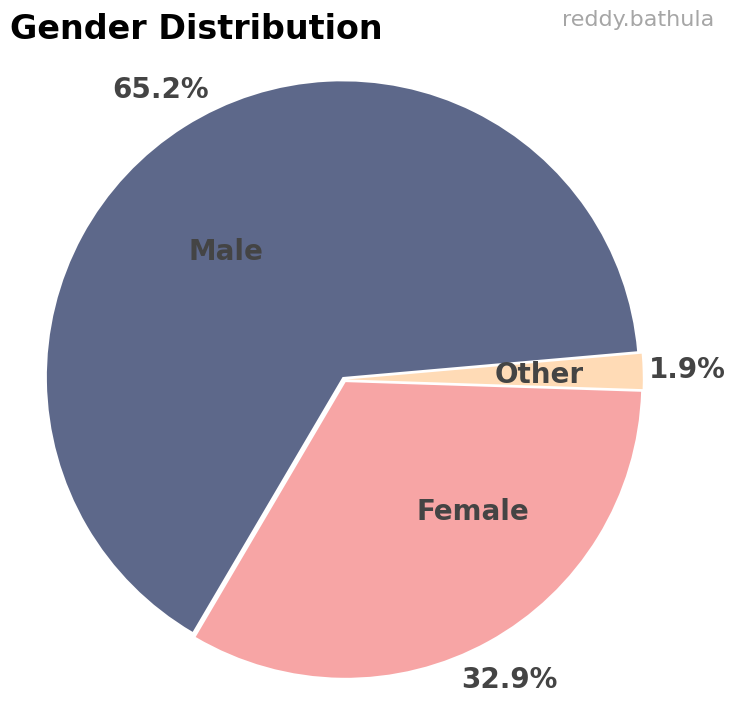

In [14]:
dataset.plot_gender_distribution()

- The dataset is highly imbalanced with respect to gender. Its dominated by 65% of Males compared to 33% of Females and just 2% of Others. 
- Its consistent with the distributions given to generate the dataset.

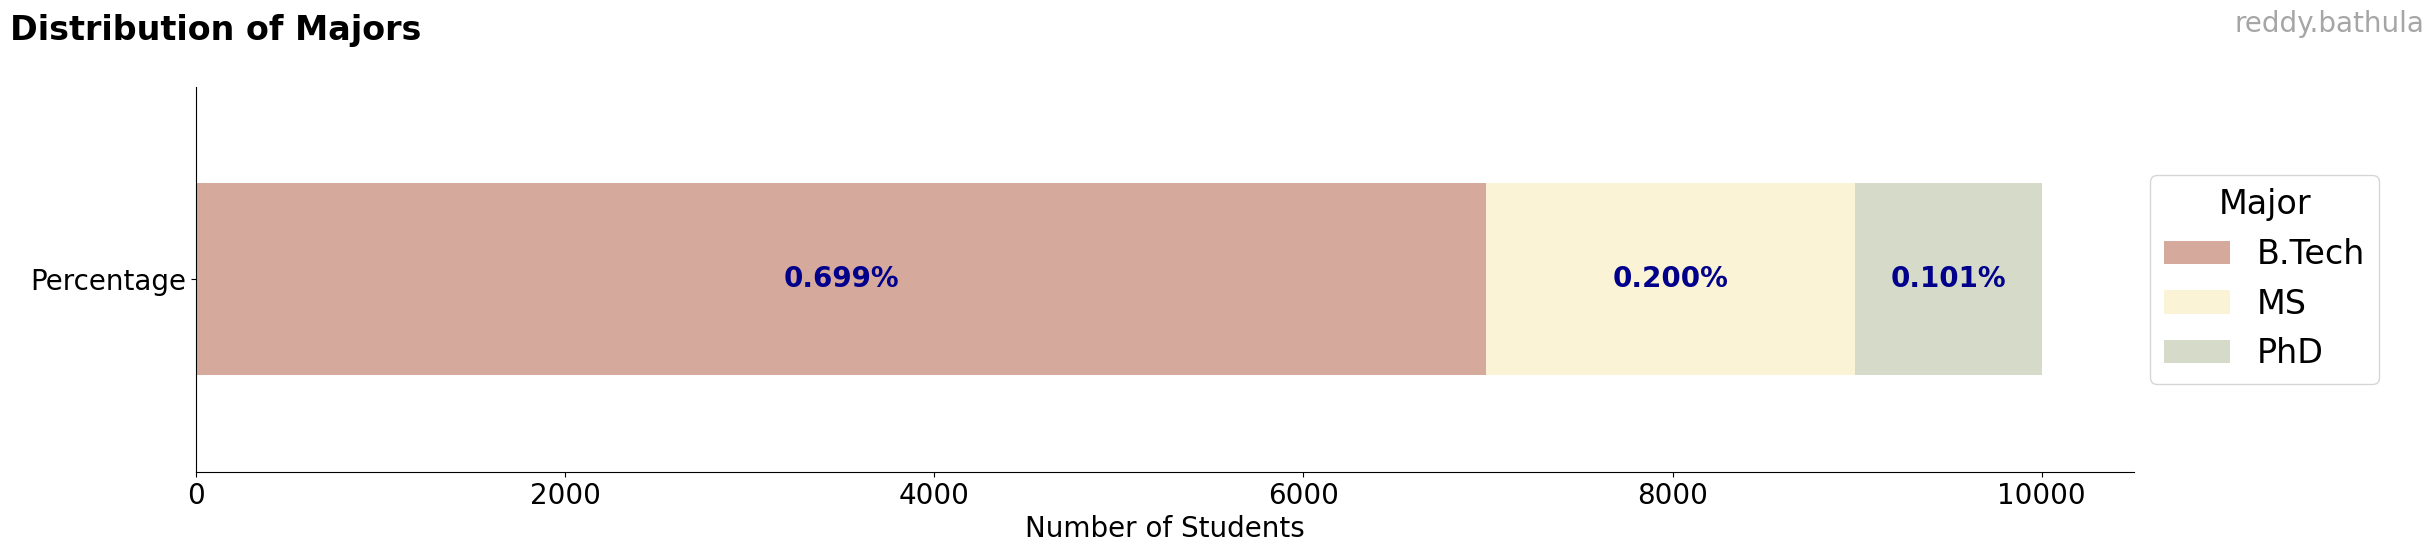

In [15]:
dataset.plot_major_distribution()

- B.Tech student comprise almost 70% of the total students, with MS accounting for 20% and PhD 10%. 
- Its consistent with the distributions given to generate the dataset, validating generating it.

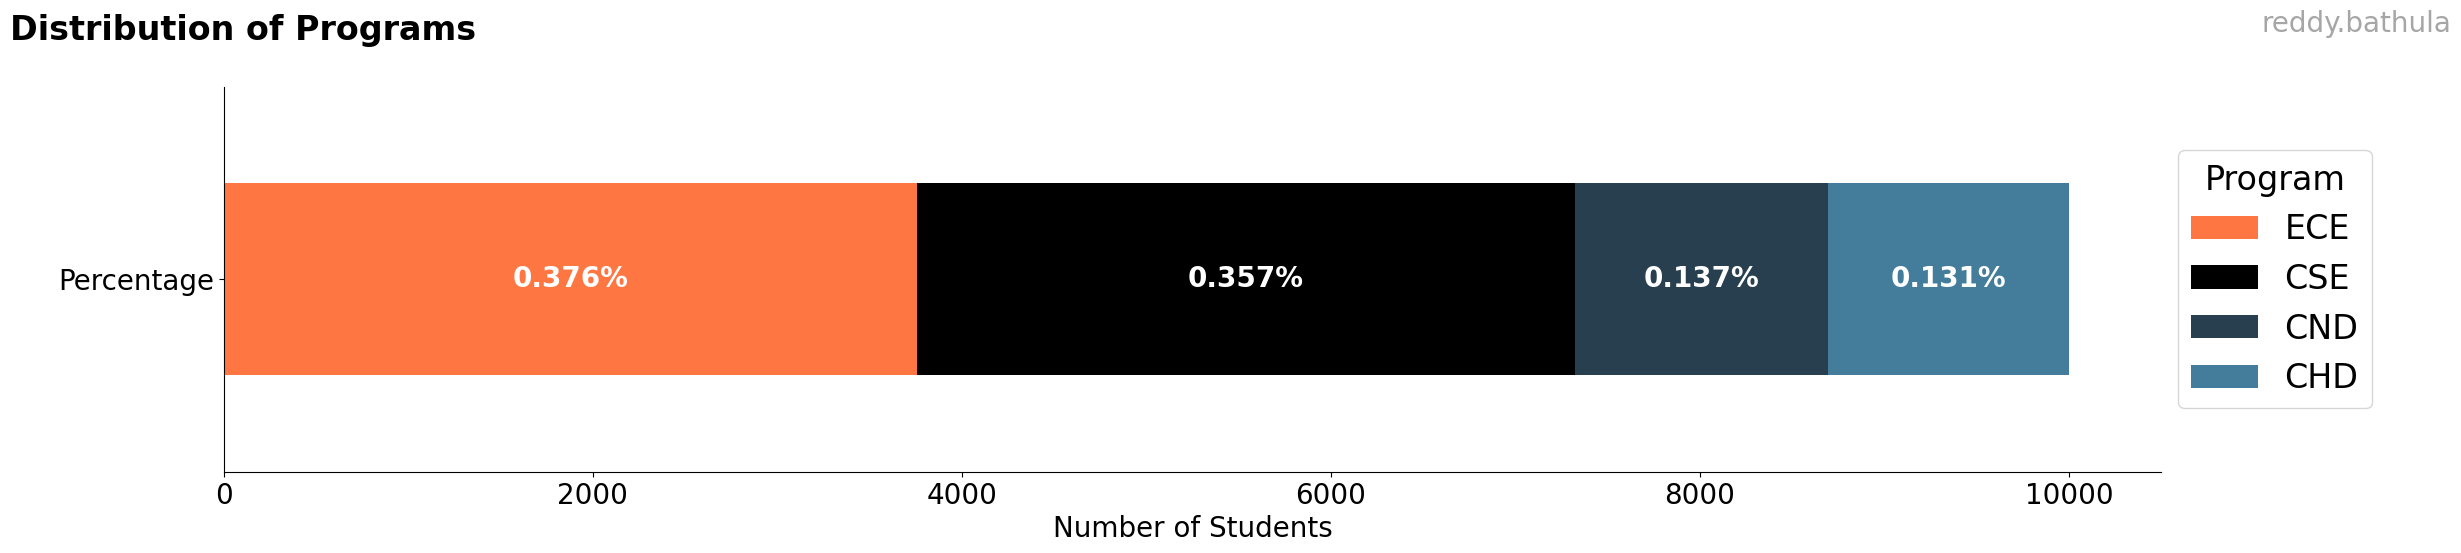

In [16]:
dataset.plot_program_distribution()

- ECE and CSE are the most popular programs.

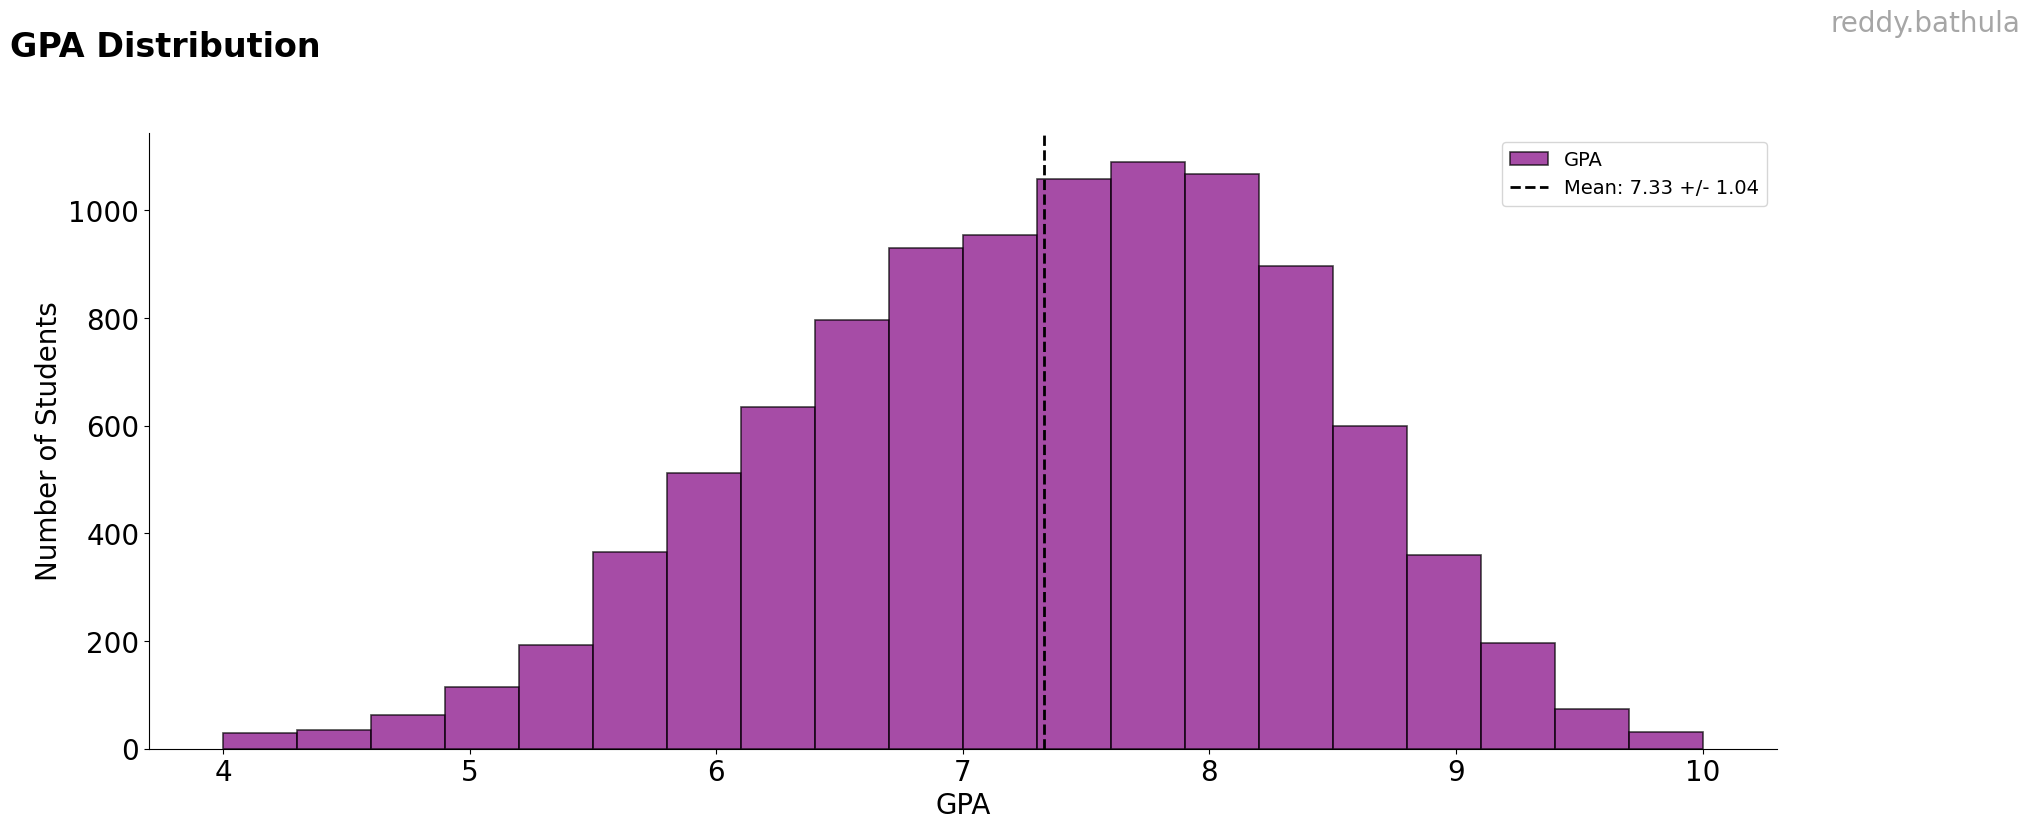

In [17]:
dataset.plot_gpa_distribution()

- GPA lies between 4 and 10.
- Mean GPA is 7.33 with Std at 1.04

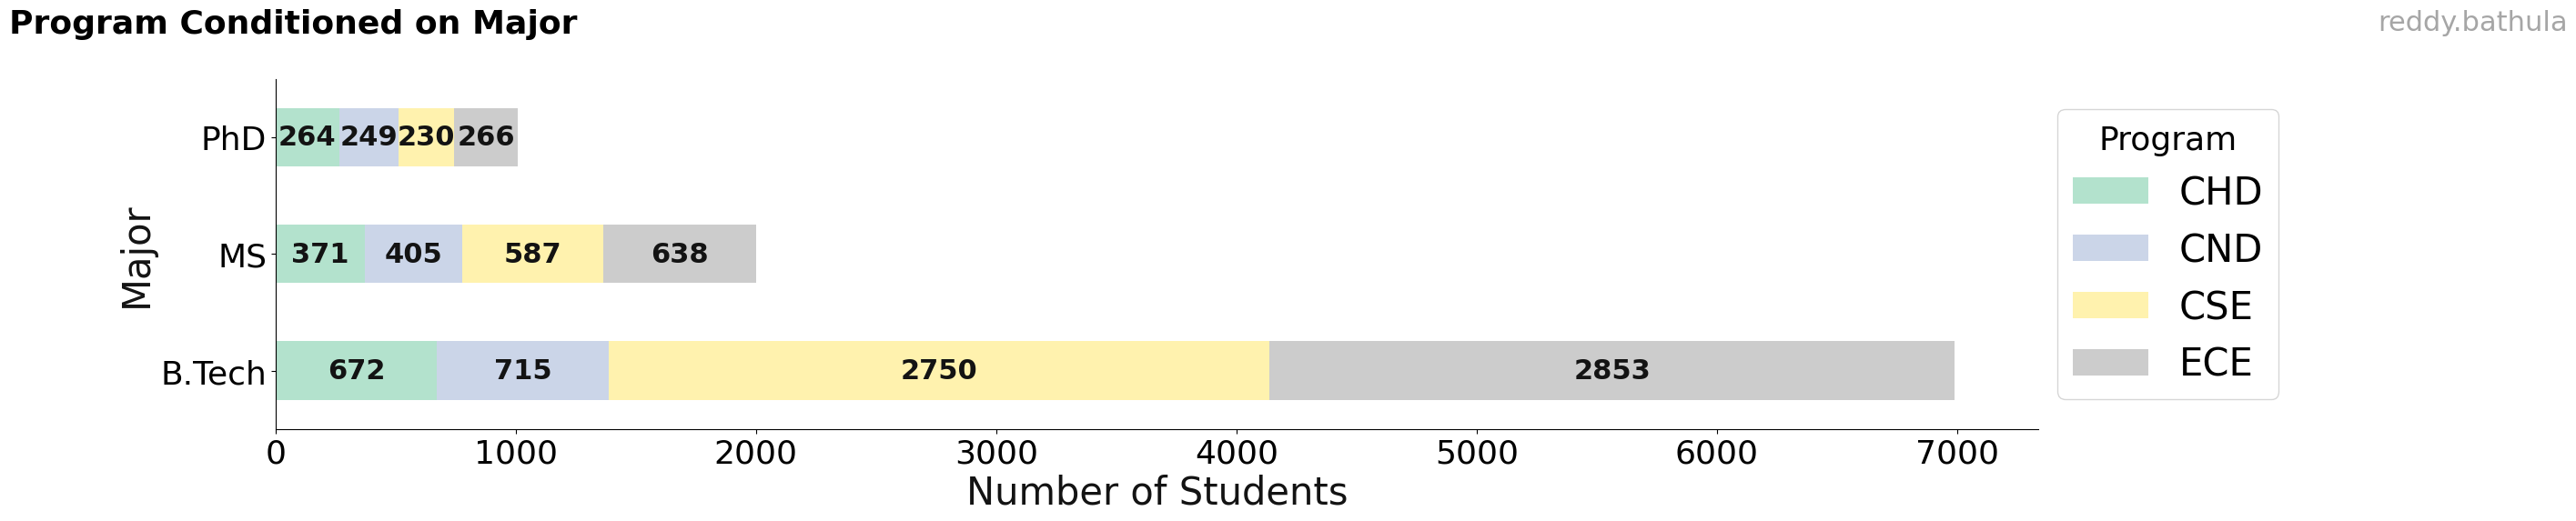

In [18]:
dataset.plot_program_by_major()

- Majority of B.Tech students are in ECE or CSE.
- Similar but relatively closer trend can be observed with MS students.
- PhD students are evenly placed out.
- More PhD students in CHD and CND compared to CSE, which is not observed with B.Tech or MS students.
- ECE students dominate in all majors in terms of their count.

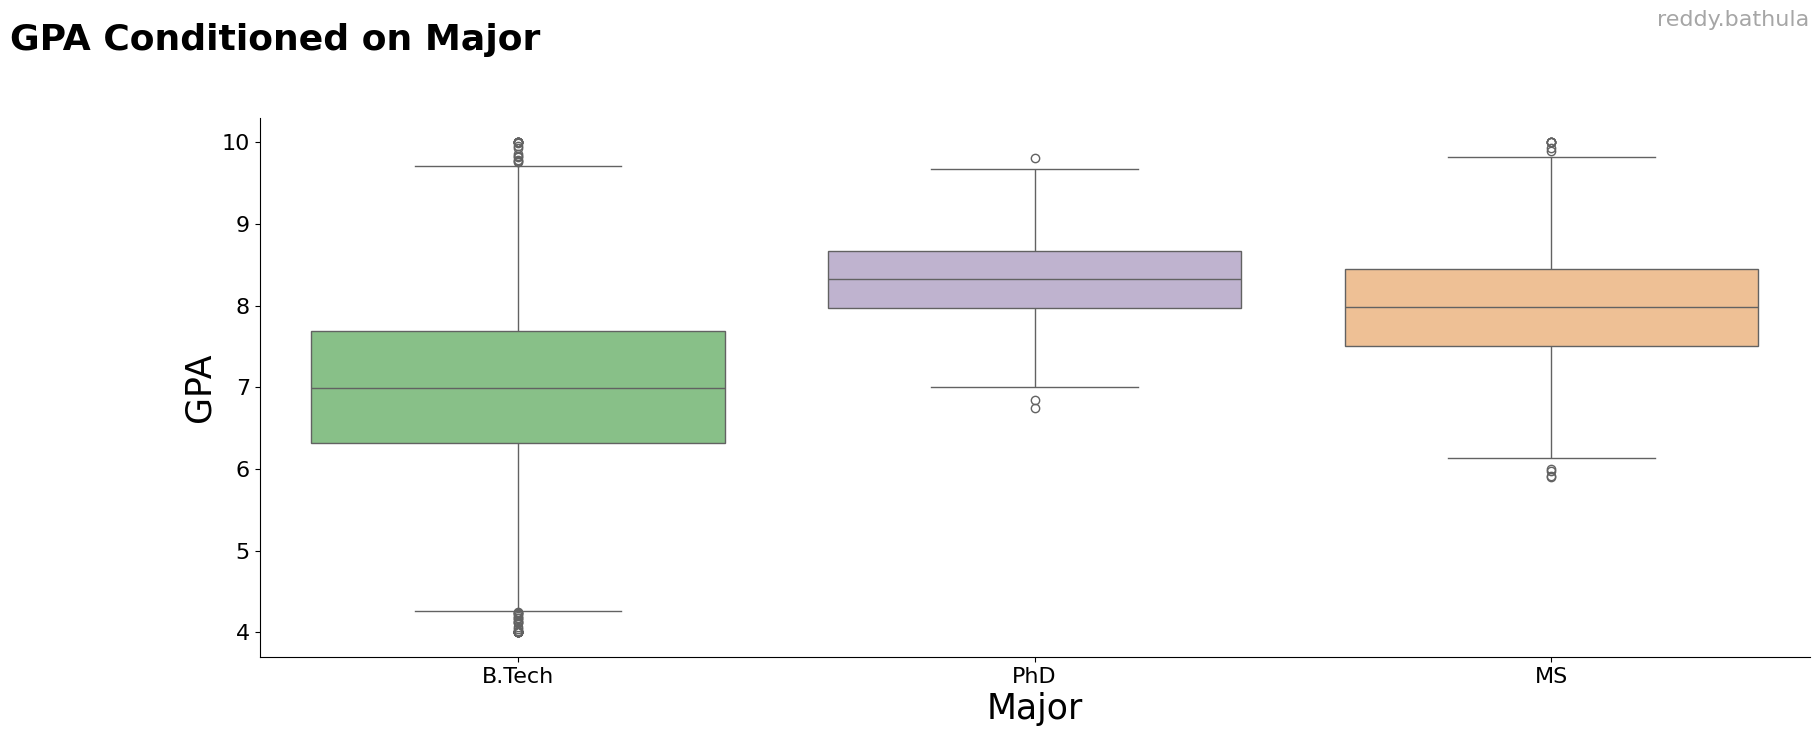

In [19]:
dataset.plot_gpa_by_major()

- PhD Students perform better than MS students followed by B.Tech.
- But it can also be observed that, PhD students are less in number compared to MS, which inturn is lesser that B.Tech students.

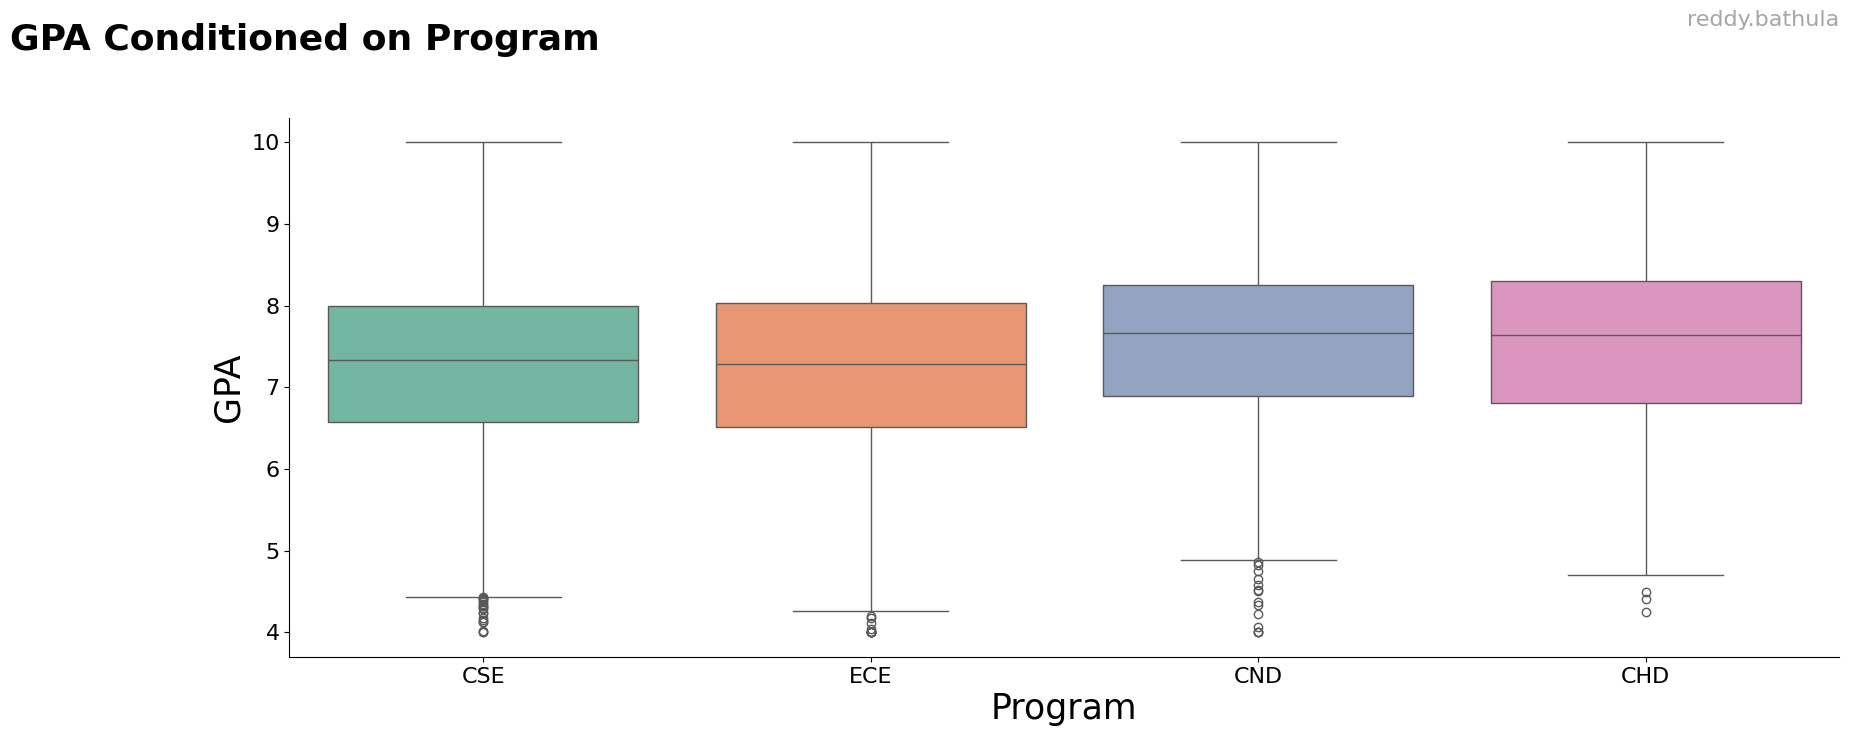

In [20]:
dataset.plot_gpa_by_program()

- Average GPA of CND and CHD students is the greater than CSE or ECE. 
- But its not that different among these programs. Hardly a difference of 0.3 only seperating them.

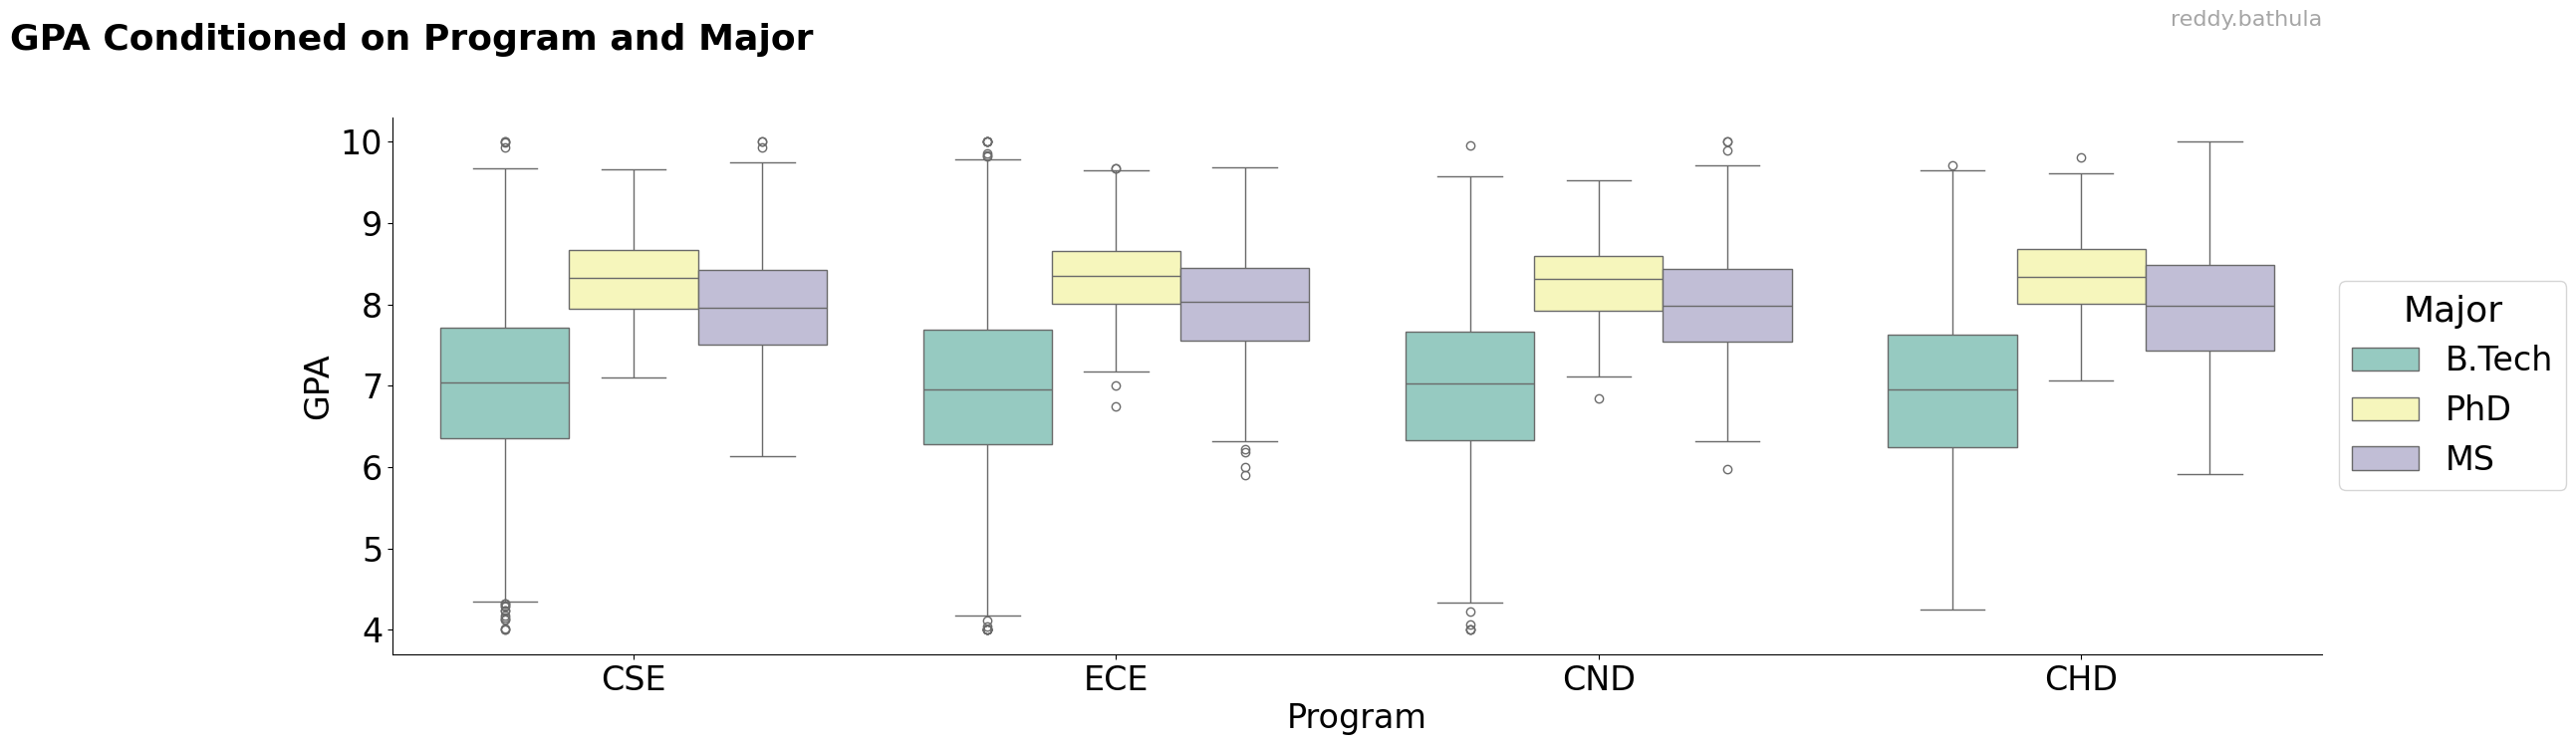

In [21]:
dataset.plot_gpa_by_program_and_major()

- PhD students achieve higher GPA across programs, followed by MS and then B.Tech.
- Majority of the low scorers are from B.Tech.

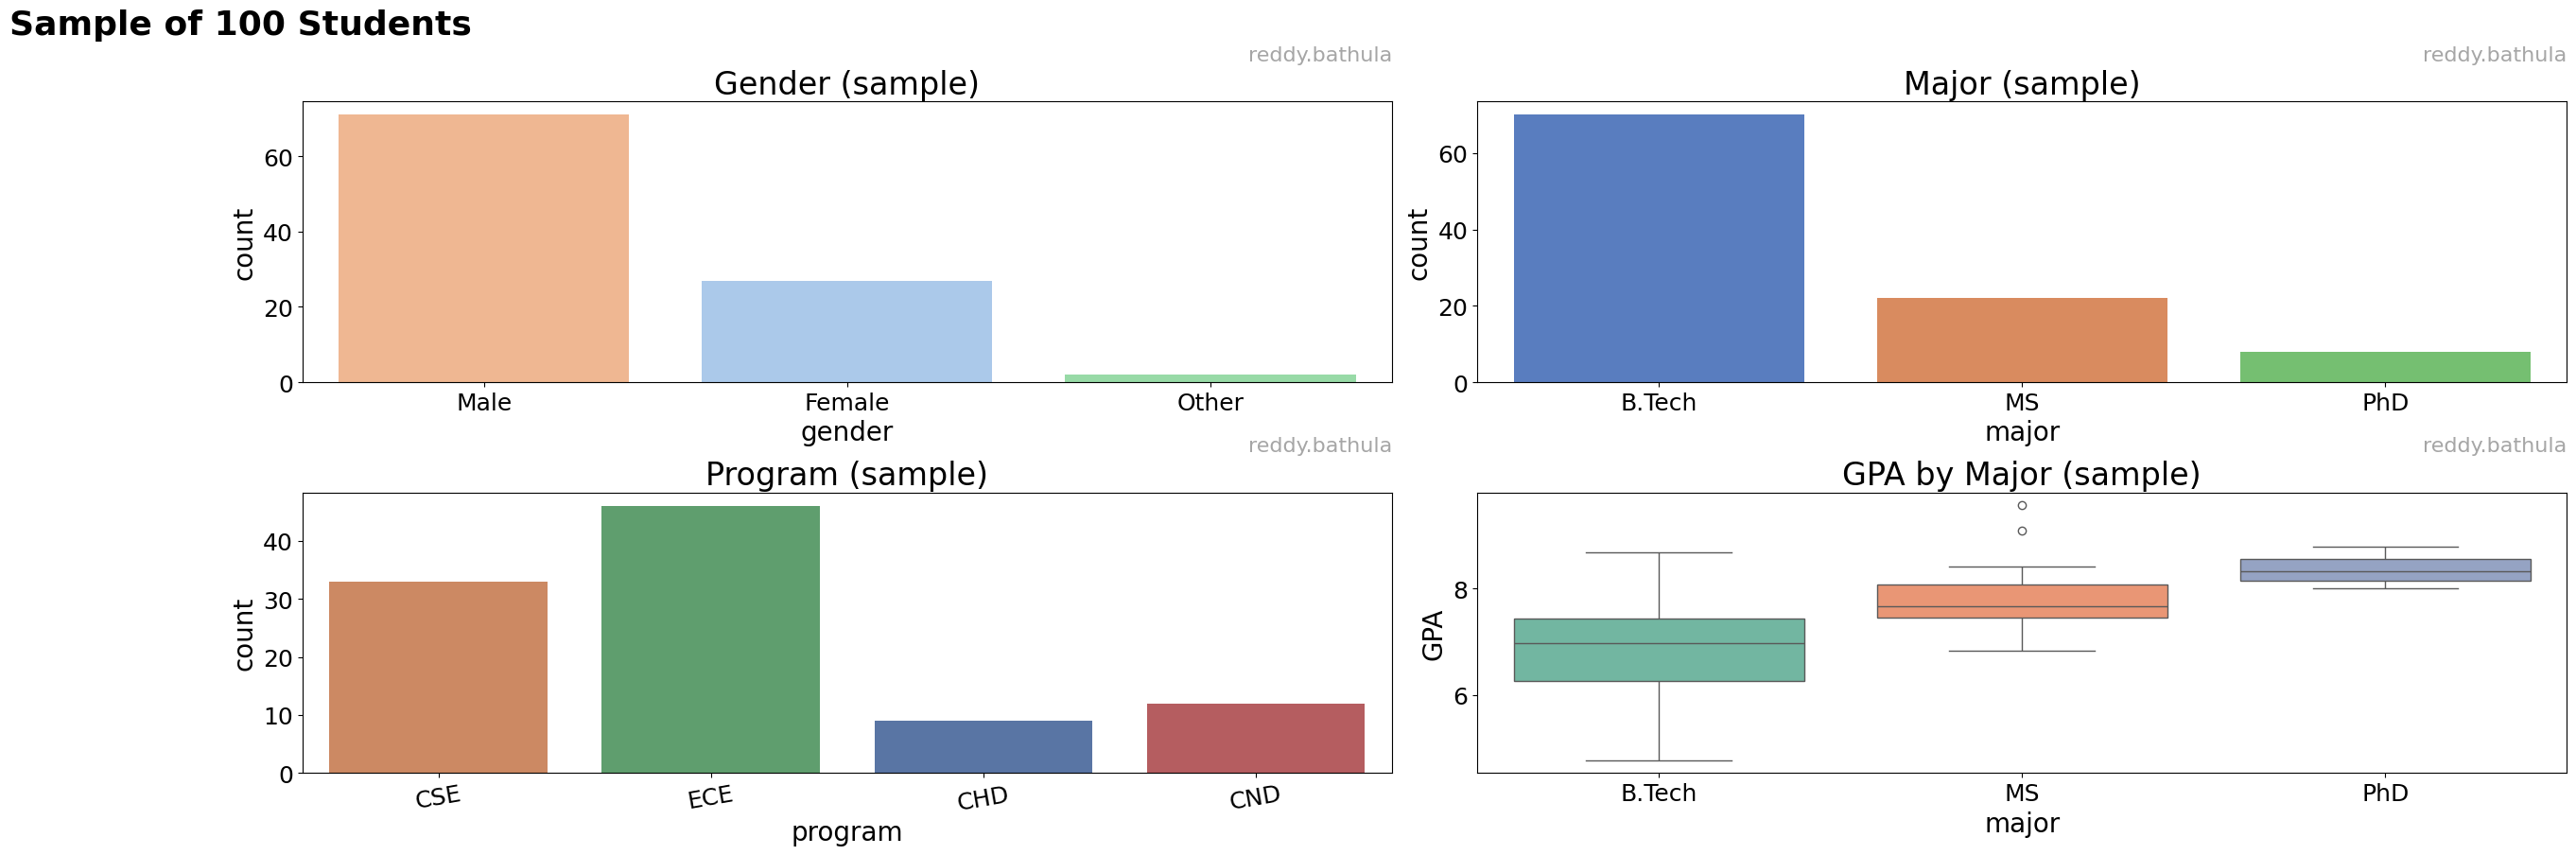

In [22]:
dataset.plot_sampled_dataset()

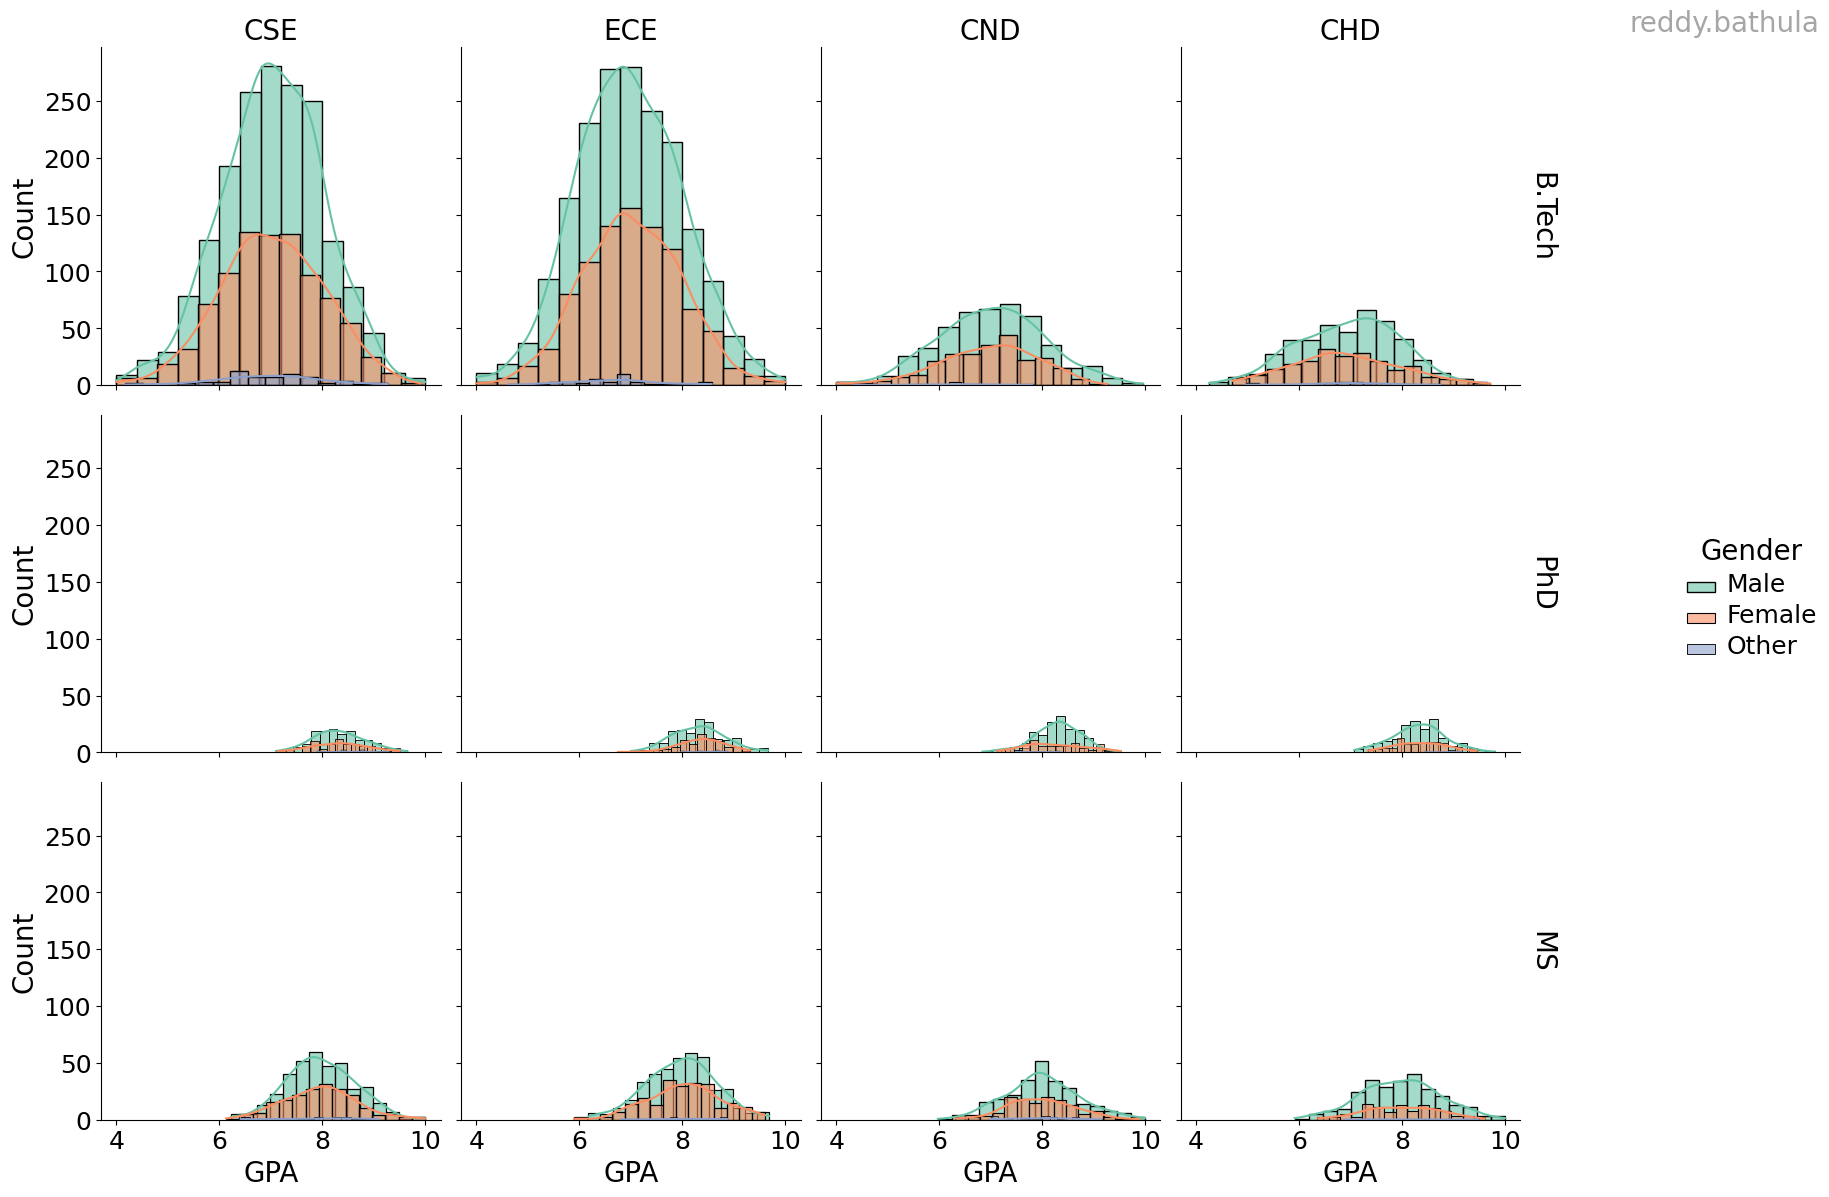

In [23]:
dataset.plot_entire_dataset_summary()

## b: GPA Summary Statistics

In [24]:
print("=== GPA Mean and Standard Deviation ===")
mean_gpa, std_gpa = dataset.gpa_mean_std()

=== GPA Mean and Standard Deviation ===
Dataset GPA Statistics:
Mean GPA: 7.3307
Standard Deviation: 1.0390


- The average GPA is 7.33 and its standard deviation 1.03.
- This indicates majority of the student performances lie between 6.3 and 8.3, indicating a stable academic record.

## c: Program-Major Combinations


=== Program-Major Pair Counts ===
Student counts per (program, major) pair:
major    B.Tech   MS  PhD
program                  
CHD         672  371  264
CND         715  405  249
CSE        2750  587  230
ECE        2853  638  266


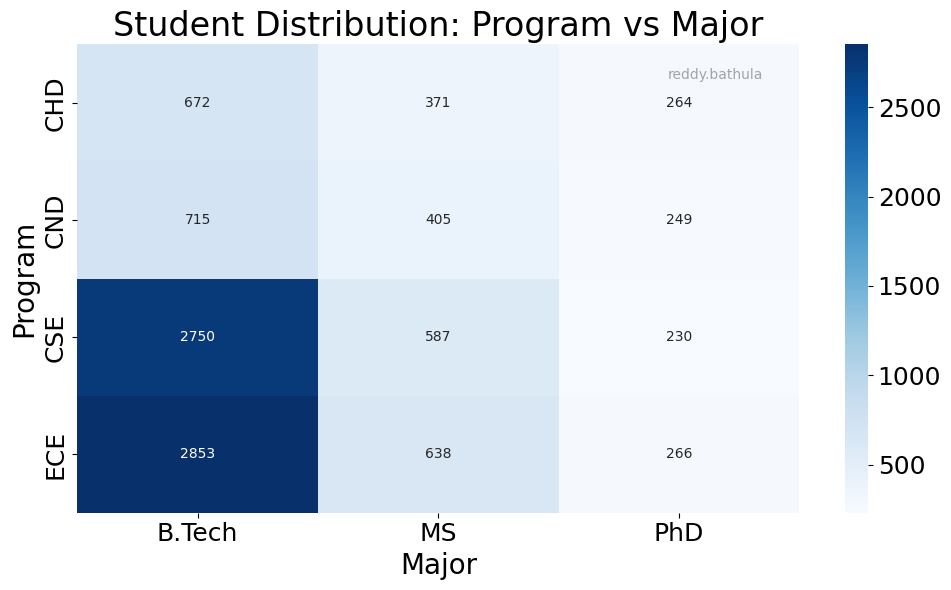

In [25]:
print("\n=== Program-Major Pair Counts ===")
counts_df = dataset.count_students_per_program_major_pair()
dataset.visualize_students_per_program_major_pair(counts_df)


- B.Tech has the highest enrollment across all programs.
- CSE and ECE are the most popular programs.
- PhD students are evenly distributed across programs.

# Question 1.2 : Simple vs Stratified Sampling

In [26]:
print("\n=== Sampling Comparison: Random vs Stratified ===")
random_avg, random_std = dataset.get_gpa_mean_std_random(n=500, repeats=50)
stratified_avg, stratified_std = dataset.get_gpa_mean_std_stratified(n=500, repeats=50)

print(f"\nComparison:")
print(f"Random sampling std: {random_std:.4f}")
print(f"Stratified sampling std: {stratified_std:.4f}")
print(f"Stratified has {'lower' if stratified_std < random_std else 'higher'} standard deviation")


=== Sampling Comparison: Random vs Stratified ===
Random Sampling Results (n=500, repeats=50):
Average mean GPA: 7.3404
Standard deviation of means: 0.0514
Stratified Sampling Results (n=500, repeats=50):
Average mean GPA: 7.3314
Standard deviation of means: 0.0413

Comparison:
Random sampling std: 0.0514
Stratified sampling std: 0.0413
Stratified has lower standard deviation


- Stratified sampling has lower std deviation because it preserves the population distribution, reducing sampling variability.

# Question 1.3: Gender-Balanced Cohort 


=== Gender Balanced Sampling ===
Repeat 1: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 2: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 3: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 4: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 5: {'Male': 100, 'Female': 100, 'Other': 100}

=== Strategy A Gender Sampling ===
Strategy A Repeat 1: {'Male': 109, 'Female': 101, 'Other': 90}
Strategy A Repeat 2: {'Other': 115, 'Female': 97, 'Male': 88}
Strategy A Repeat 3: {'Male': 105, 'Female': 100, 'Other': 95}
Strategy A Repeat 4: {'Male': 107, 'Other': 100, 'Female': 93}
Strategy A Repeat 5: {'Other': 109, 'Female': 108, 'Male': 83}

=== Gender Balance vs Sample Size ===
Sample size 300: Average max relative difference = 0.0460
Sample size 600: Average max relative difference = 0.0307
Sample size 900: Average max relative difference = 0.0320
Sample size 1200: Average max relative difference = 0.0218
Sample size 1500: Average max relative difference = 0.0210


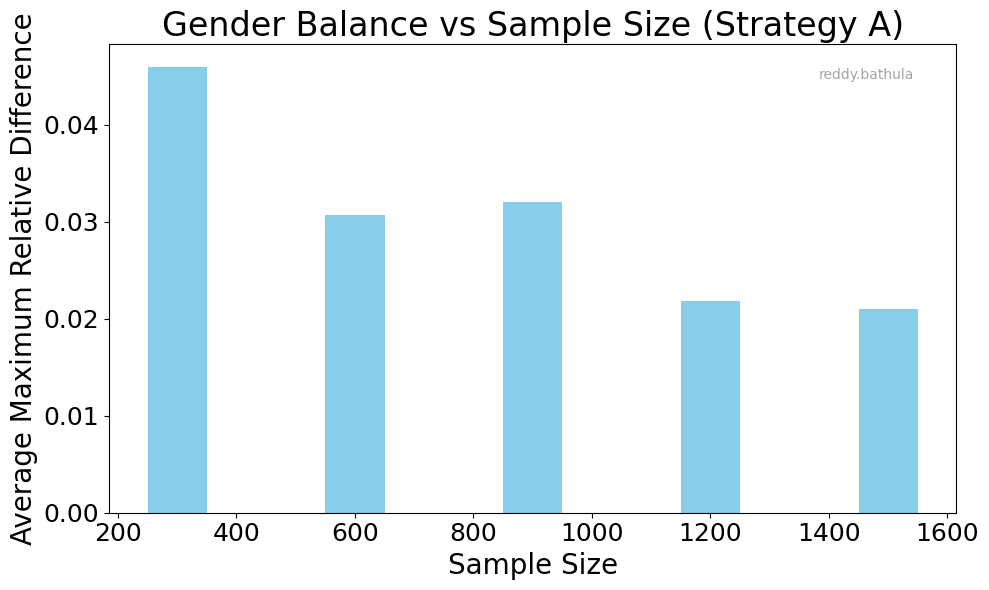

In [27]:
print("\n=== Gender Balanced Sampling ===")
balanced_counts = dataset.get_gender_balanced_counts(n=300, repeats=5)

print("\n=== Strategy A Gender Sampling ===")
strategy_a_counts = dataset.sample_gender_uniform_random(n=300, repeats=5)

print("\n=== Gender Balance vs Sample Size ===")
sample_sizes = [300, 600, 900, 1200, 1500]
dataset.plot_avg_max_gender_diff_vs_sample_size(sample_sizes, repeats=10)

# Question 1.4: GPA-Uniform Cohort 


=== Uniform GPA Sampling ===
Bin  1 (GPA 4.00-4.60): Found   65 students.
Bin  2 (GPA 4.60-5.20): Found  177 students.
Bin  3 (GPA 5.20-5.80): Found  557 students.
Bin  4 (GPA 5.80-6.40): Found 1147 students.
Bin  5 (GPA 6.40-7.00): Found 1727 students.
Bin  6 (GPA 7.00-7.60): Found 2014 students.
Bin  7 (GPA 7.60-8.20): Found 2158 students.
Bin  8 (GPA 8.20-8.80): Found 1495 students.
Bin  9 (GPA 8.80-9.40): Found  555 students.
Bin 10 (GPA 9.40-10.00): Found  105 students.

Successfully sampled 100 students.


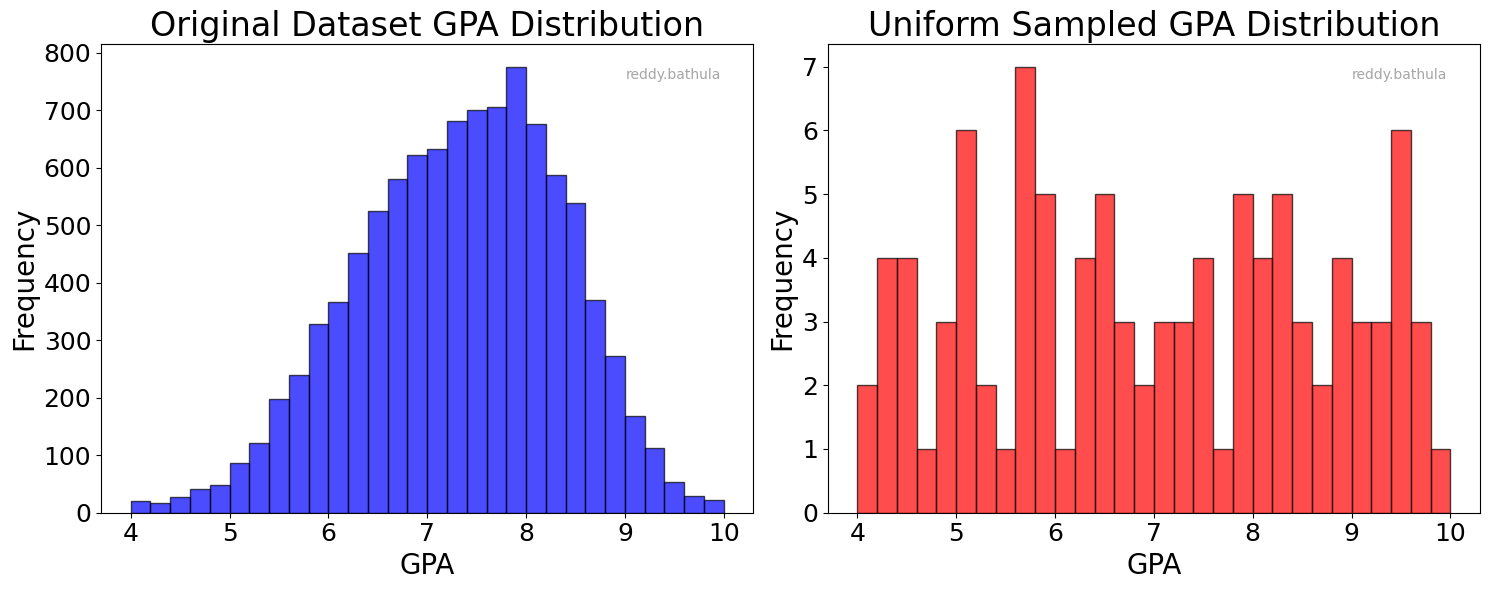

In [28]:
print("\n=== Uniform GPA Sampling ===")
uniform_gpa_sample = dataset.sample_gpa_uniform(n=100, bins=10)
dataset.plot_gpa_histogram_comparison(uniform_gpa_sample)

- Since the size of the available samples if greater than total_samples/num_of_bins , replacement is not required. Here, for 100 samples and 10 bins, we need only 10 samples for each bin and they are available.

# Question 1.5 : Program-Major Balanced Cohort


=== Balanced Program-Major Sampling ===

Sampled 60 students with balanced program-major representation.
Sampled data counts per (program, major) pair:
major    B.Tech  MS  PhD
program                 
CHD           8   3    2
CND           4   5    6
CSE           5   8    5
ECE           6   4    4


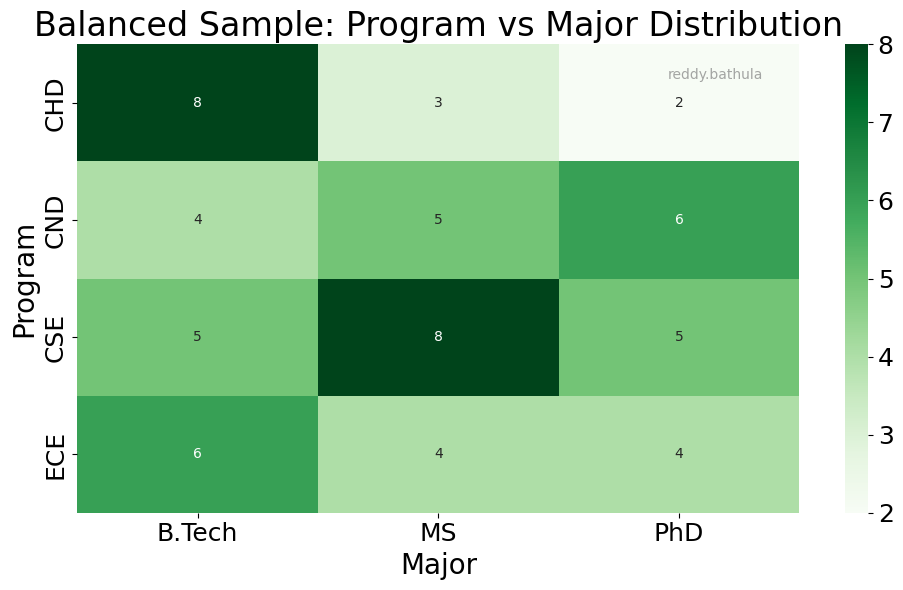

In [29]:
print("\n=== Balanced Program-Major Sampling ===")
balanced_prog_major_sample = dataset.sample_program_major_balanced(n=60)
dataset.show_program_major_counts_and_heatmap(balanced_prog_major_sample)

- All groups were large enough to be sampled for this problem.
- To handle small groups, we would sample with replacement.